In [1]:
%matplotlib inline

import sys
!git clone https://www.github.com/hrmacbeth/turtle-dynamical.git
sys.path.append('turtle-dynamical')

!pip install --upgrade scikit-learn

import numpy as np
import matplotlib.pyplot as plt
import config as cfg

cfg.optimizer_file = 'jason_bonner_jupyter_notebook'

# Import datasets, classifiers and performance metrics
from sklearn import metrics
from tensorflow import keras
from neural_network import MLPClassifier

Cloning into 'turtle-dynamical'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 67 (delta 32), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (67/67), 95.23 KiB | 1.22 MiB/s, done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


ModuleNotFoundError: ignored


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


## Digits dataset

The MNIST digits dataset consists of 28 x 28
pixel images of digits, stored as
28 x 28 arrays of grayscale values, which we label as `X_train`/`X_test`. We display the first 4 images. For each image, we have a corresponding record of a number between 0 and 9 which is the digit it depicts, which we label as `y_train`/`y_test`.  We include these as the titles of the corresponding pictures below.



11501568/11490434 [==============================] - 0s 0us/step
Dataset containing 60000 training images and 10000 test images.
Each image has size 28 x 28.


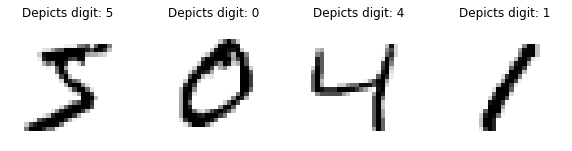

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
n_train_samples = len(X_train)
n_test_samples = len(X_test)

print(f"Dataset containing {n_train_samples} training images and {n_test_samples} test images.")
print(f"Each image has size {len(X_train[0])} x {len(X_train[0][0])}.")

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, X_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Depicts digit: {label}')

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(28, 28)`` into shape
``(784,1)``.  We also rescale the pixel darknesses to range from 0 to 1 rather than 0 to 256.

In [ ]:
# flatten the images
X_train = X_train.reshape((n_train_samples, -1))
X_test = X_test.reshape((n_test_samples, -1))

# Scale images to the [0, 1] range
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

We then set up a neural network:  we will try with just one hidden layer, with 32 neurons, but you can experiment by changing the number of hidden layers and their sizes.

In [ ]:
# Create a classifier: a neural network
clf = MLPClassifier(hidden_layer_sizes=(32,), alpha=1, verbose=True)

print(f"Neural network: for 28 x 28 = 784 features, it has {clf.num_parameters(784)} parameters.")

Neural network: for 28 x 28 = 784 features, it has 25153 parameters.


Finally we train the neural network.  Depending on the value of `max_iter`, this may take some time.  Every 5 iterations, it reports on the current value of the "loss" function (a measure of error) -- the smaller this value is, the better.

After training, the neural network can be used to predict the value of the digit for the samples in the test subset.  We report the accuracy rate for these predictions.  Note that random chance would give an accuracy rate of 0.1, since there are 10 digits to choose from.

In [ ]:
# Learn the digits on the train subset
clf.fit(X_train, y_train, max_iter=300)

# Overall accuracy of predictions
print(f"The accuracy of prediction on the test set is {clf.score(X_test, y_test)}.")

Iteration 5, loss = 2.242867970784505
Iteration 10, loss = 2.1132058118979136
Iteration 15, loss = 1.9961532734076182
Iteration 20, loss = 1.8851939947764078
Iteration 25, loss = 1.782093057235082
Iteration 30, loss = 1.688224029858907
Iteration 35, loss = 1.6038450138409932
Iteration 40, loss = 1.5281418682893118
Iteration 45, loss = 1.4600317220052084
Iteration 50, loss = 1.3986778118610383
Iteration 55, loss = 1.343383228445053
Iteration 60, loss = 1.2935592737992605
Iteration 65, loss = 1.2487354864279427
Iteration 70, loss = 1.2084118535995483
Iteration 75, loss = 1.1721822476704917
Iteration 80, loss = 1.1395904149055482
Iteration 85, loss = 1.110231666882833
Iteration 90, loss = 1.0837313302993776
Iteration 95, loss = 1.0597479366302491
Iteration 100, loss = 1.0379935339132944
Iteration 105, loss = 1.0182034128824868
Iteration 110, loss = 1.0001517970085145
Iteration 115, loss = 0.9836496937433878
Iteration 120, loss = 0.9685325898488362
Iteration 125, loss = 0.9546490578651428


Below we visualize the first 6 test samples and show their predicted
digit value in the title.



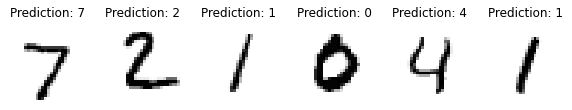

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))
for ax, image in zip(axes, X_test):
    ax.set_axis_off()
    prediction = clf.predict([image])
    X_test = (X_test * 255).astype("int")
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction[0]}')

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Confusion matrix:
[[396  28  42  53  23 247  24  19   5 143]
 [ 58 423  56  49  51 283   8  17  22 168]
 [ 41  75 333  69  45 229  30  24  22 164]
 [ 33  62  58 308  50 280  17  30  21 151]
 [ 46  54  53  54 187 369  26  27  11 155]
 [ 40  47  59  81  46 346  20  26  16 211]
 [ 57  39  69  66  43 241 231  17   5 190]
 [ 46  60  60  56  58 312  11 242  14 169]
 [ 45  78  59  91  54 308  16  38 110 175]
 [ 45  63  41  65 127 308  20  44  10 286]]


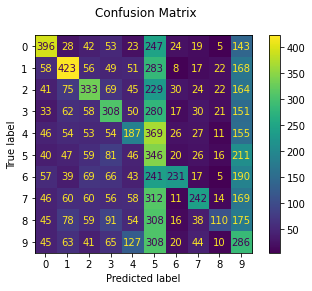

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()